In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('/Users/hjama/ai-learning/rpp/data/processed/rice_prices_cleaned.csv')
print(df.shape)
df.head()

(332022, 19)


,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd,kg,price_per_kg_usd
0,BGD,2000-01-15,Dhaka,Dhaka,Dhaka,2574,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",588,100 KG,actual,Wholesale,BDT,1138.80,16.62,100.0,0.1662
1,BGD,2000-07-15,Dhaka,Dhaka,Dhaka,2574,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",588,100 KG,actual,Wholesale,BDT,1156.00,16.88,100.0,0.1688
2,BGD,2000-08-15,Dhaka,Dhaka,Dhaka,2574,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",588,100 KG,actual,Wholesale,BDT,1102.50,16.09,100.0,0.1609
3,BGD,2000-09-15,Dhaka,Dhaka,Dhaka,2574,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",588,100 KG,actual,Wholesale,BDT,1100.00,16.06,100.0,0.1606
4,BGD,2000-10-15,Dhaka,Dhaka,Dhaka,2574,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",588,100 KG,actual,Wholesale,BDT,1142.25,16.68,100.0,0.1668


In [32]:
df = df.drop(columns=['market_id', 'market', 'category', 'commodity_id', 'unit', 'currency', 'local_price', 'price_usd', 'kg'])
df.head()

,country_code,date,county,subcounty,latitude,longitude,commodity,price_flag,price_type,price_per_kg_usd
0,BGD,2000-01-15,Dhaka,Dhaka,23.81,90.41,"Rice (coarse, BR-8/ 11/, Guti Sharna)",actual,Wholesale,0.1662
1,BGD,2000-07-15,Dhaka,Dhaka,23.81,90.41,"Rice (coarse, BR-8/ 11/, Guti Sharna)",actual,Wholesale,0.1688
2,BGD,2000-08-15,Dhaka,Dhaka,23.81,90.41,"Rice (coarse, BR-8/ 11/, Guti Sharna)",actual,Wholesale,0.1609
3,BGD,2000-09-15,Dhaka,Dhaka,23.81,90.41,"Rice (coarse, BR-8/ 11/, Guti Sharna)",actual,Wholesale,0.1606
4,BGD,2000-10-15,Dhaka,Dhaka,23.81,90.41,"Rice (coarse, BR-8/ 11/, Guti Sharna)",actual,Wholesale,0.1668


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

def preprocess_data(df, target_col='price_per_kg_usd', test_size=0.2, random_state=42):
    """
    Preprocess data for machine learning models.
    
    Parameters:
    -----------
    df : DataFrame
        Input dataframe
    target_col : str
        Name of target column
    test_size : float
        Proportion of data for test set (default 0.2)
    random_state : int
        Random seed for reproducibility
    
    Returns:
    --------
    X_train, X_test, y_train, y_test : DataFrames/Series
        Preprocessed train/test splits
    label_encoders : dict
        Dictionary of fitted label encoders for each categorical column
    """
    
    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Encode categorical variables
    X_encoded = X.copy()
    label_encoders = {}
    
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
    
    # Convert date to numerical features
    if 'date' in X_encoded.columns:
        X_encoded['date'] = pd.to_datetime(X_encoded['date'])
        X_encoded['year'] = X_encoded['date'].dt.year
        X_encoded['month'] = X_encoded['date'].dt.month
        X_encoded['day'] = X_encoded['date'].dt.day
        X_encoded = X_encoded.drop(columns=['date'])
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=test_size, random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test, label_encoders


def print_data_summary(X_train, X_test, categorical_cols):
    """
    Print summary of preprocessed data.
    
    Parameters:
    -----------
    X_train : DataFrame
        Training features
    X_test : DataFrame
        Test features
    categorical_cols : list
        List of categorical column names
    """
    print(f"\nEncoding {len(categorical_cols)} categorical features...")
    print(f"Features used: {list(X_train.columns)}")
    print(f"Total samples: {len(X_train) + len(X_test):,}")
    print(f"\nTraining set: {len(X_train):,} samples")
    print(f"Test set: {len(X_test):,} samples")

PREPROCESSING HELPER FUNCTIONS LOADED

Functions available:
  - preprocess_data(): Encode features and split train/test
  - print_data_summary(): Display preprocessing summary

These functions eliminate duplicate preprocessing code!


MUTUAL INFORMATION SCORE ANALYSIS

Encoding 7 categorical features...

Calculating mutual information scores...
Features: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']

MUTUAL INFORMATION SCORES (Higher = More Important)
     Feature  MI_Score
   longitude  1.044136
   subcounty  0.974020
      county  0.973286
country_code  0.949090
    latitude  0.925129
   commodity  0.499538
  price_type  0.146012
  price_flag  0.050047
        year  0.001006
         day  0.000707
       month  0.000586


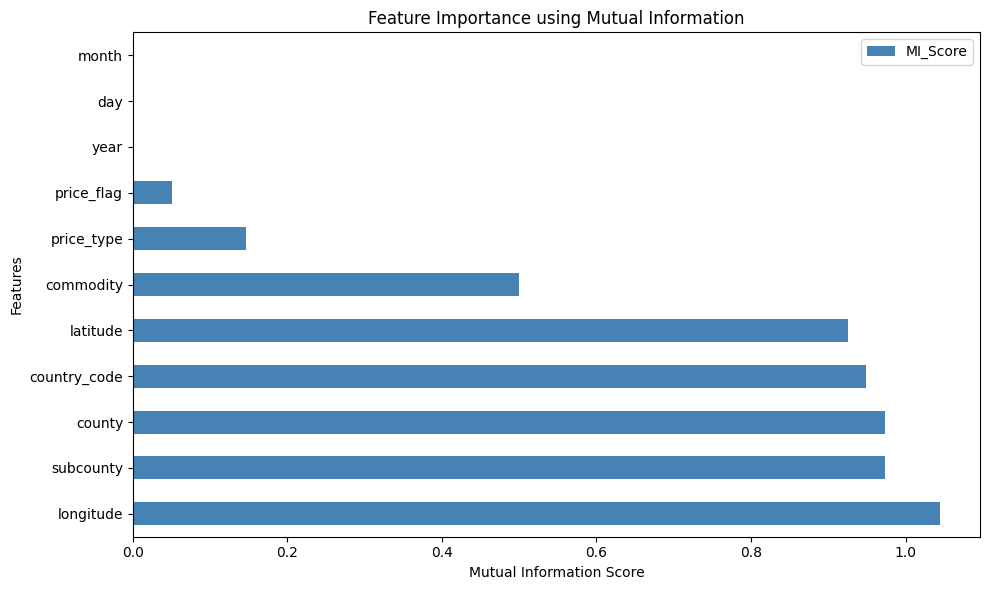


INTERPRETATION:
- Higher MI score = stronger relationship with price
- Score of 0 = no mutual information (independent)
- Use top features for your prediction model

Top 5 most important features:
  longitude: 1.0441
  subcounty: 0.9740
  county: 0.9733
  country_code: 0.9491
  latitude: 0.9251


In [34]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Prepare the data for mutual information analysis
print("="*60)
print("MUTUAL INFORMATION SCORE ANALYSIS")
print("="*60)

# Separate features and target
X = df.drop(columns=['price_per_kg_usd'])
y = df['price_per_kg_usd']

# Encode categorical variables
label_encoders = {}
X_encoded = X.copy()

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nEncoding {len(categorical_cols)} categorical features...")

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Convert date to numerical features
if 'date' in X_encoded.columns:
    X_encoded['date'] = pd.to_datetime(X_encoded['date'])
    X_encoded['year'] = X_encoded['date'].dt.year
    X_encoded['month'] = X_encoded['date'].dt.month
    X_encoded['day'] = X_encoded['date'].dt.day
    X_encoded = X_encoded.drop(columns=['date'])

print(f"\nCalculating mutual information scores...")
print(f"Features: {list(X_encoded.columns)}")

# Calculate mutual information scores
mi_scores = mutual_info_regression(X_encoded, y, random_state=42)

# Create a dataframe with feature names and scores
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\n" + "="*60)
print("MUTUAL INFORMATION SCORES (Higher = More Important)")
print("="*60)
print(mi_df.to_string(index=False))

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))
mi_df.plot(x='Feature', y='MI_Score', kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Mutual Information Score')
ax.set_ylabel('Features')
ax.set_title('Feature Importance using Mutual Information')
plt.tight_layout()
plt.show()

# Show interpretation
print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- Higher MI score = stronger relationship with price")
print("- Score of 0 = no mutual information (independent)")
print("- Use top features for your prediction model")
print(f"\nTop 5 most important features:")
for idx, row in mi_df.head(5).iterrows():
    print(f"  {row['Feature']}: {row['MI_Score']:.4f}")

LINEAR REGRESSION MODEL

Encoding 7 categorical features...
Features used: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']
Total samples: 332,022

Training set: 265,617 samples
Test set: 66,405 samples

Training Linear Regression model...

MODEL PERFORMANCE

Training Set Metrics:
  R² Score: 0.0705
  RMSE: $0.4449
  MAE: $0.2881

Test Set Metrics:
  R² Score: 0.0702
  RMSE: $0.4386
  MAE: $0.2861

FEATURE COEFFICIENTS (Top 10)
     Feature  Coefficient
  price_type    -0.127819
  price_flag     0.097102
   commodity    -0.002675
    latitude     0.001992
   longitude    -0.001789
country_code     0.001576
      county    -0.000019
   subcounty    -0.000011
        year     0.000000
       month     0.000000


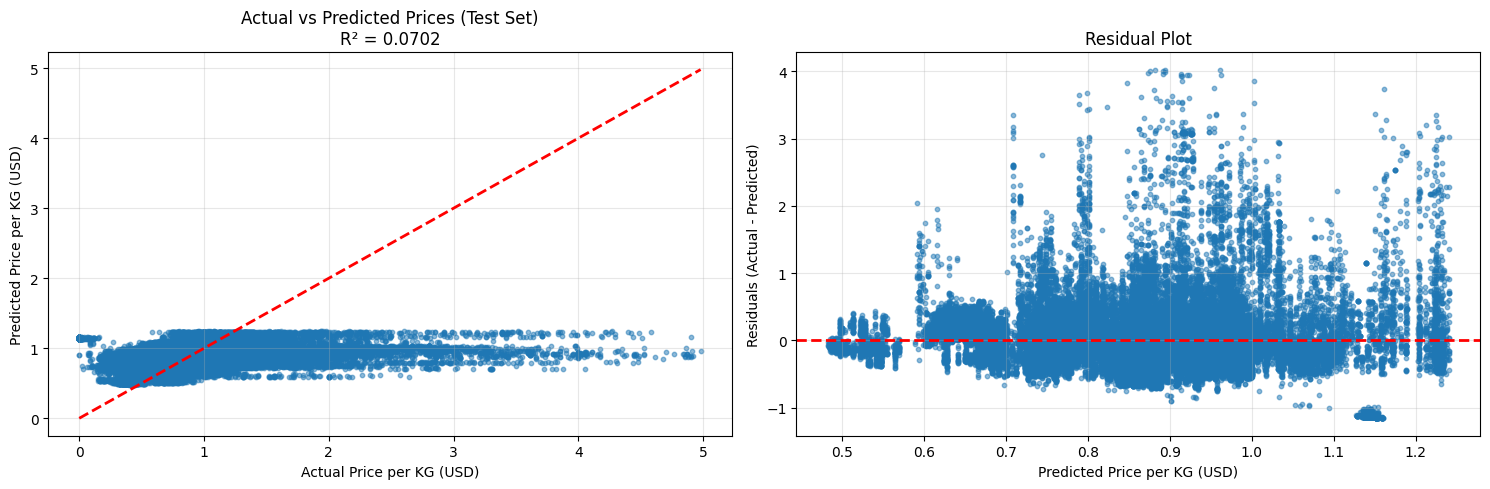


INTERPRETATION:
- R² Score: Proportion of variance explained (closer to 1 is better)
- RMSE: Average prediction error in dollars
- MAE: Average absolute error in dollars
- Residuals should be randomly scattered around 0


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("LINEAR REGRESSION MODEL")
print("="*60)

# Prepare the data
X = df.drop(columns=['price_per_kg_usd'])
y = df['price_per_kg_usd']

# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nEncoding {len(categorical_cols)} categorical features...")

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Convert date to numerical features
if 'date' in X_encoded.columns:
    X_encoded['date'] = pd.to_datetime(X_encoded['date'])
    X_encoded['year'] = X_encoded['date'].dt.year
    X_encoded['month'] = X_encoded['date'].dt.month
    X_encoded['day'] = X_encoded['date'].dt.day
    X_encoded = X_encoded.drop(columns=['date'])

print(f"Features used: {list(X_encoded.columns)}")
print(f"Total samples: {len(X_encoded):,}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Create and train the Linear Regression model
print("\nTraining Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:.4f}")
print(f"  MAE: ${train_mae:.4f}")

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:.4f}")
print(f"  MAE: ${test_mae:.4f}")

# Feature importance (coefficients)
print("\n" + "="*60)
print("FEATURE COEFFICIENTS (Top 10)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Actual vs Predicted (Test Set)
axes[0].scatter(y_test, y_test_pred, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price per KG (USD)')
axes[0].set_ylabel('Predicted Price per KG (USD)')
axes[0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {test_r2:.4f}')
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price per KG (USD)')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- R² Score: Proportion of variance explained (closer to 1 is better)")
print("- RMSE: Average prediction error in dollars")
print("- MAE: Average absolute error in dollars")
print("- Residuals should be randomly scattered around 0")

XGBOOST REGRESSION MODEL

Encoding 7 categorical features...
Features used: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']
Total samples: 332,022

Training set: 265,617 samples
Test set: 66,405 samples

Training XGBoost model...

MODEL PERFORMANCE

Training Set Metrics:
  R² Score: 0.7001
  RMSE: $0.2527
  MAE: $0.1502

Test Set Metrics:
  R² Score: 0.6871
  RMSE: $0.2544
  MAE: $0.1511

FEATURE IMPORTANCE (Top 10)
     Feature  Importance
   longitude    0.226497
country_code    0.206697
    latitude    0.162502
   commodity    0.161077
  price_flag    0.106631
  price_type    0.087671
      county    0.034138
   subcounty    0.014786
        year    0.000000
       month    0.000000


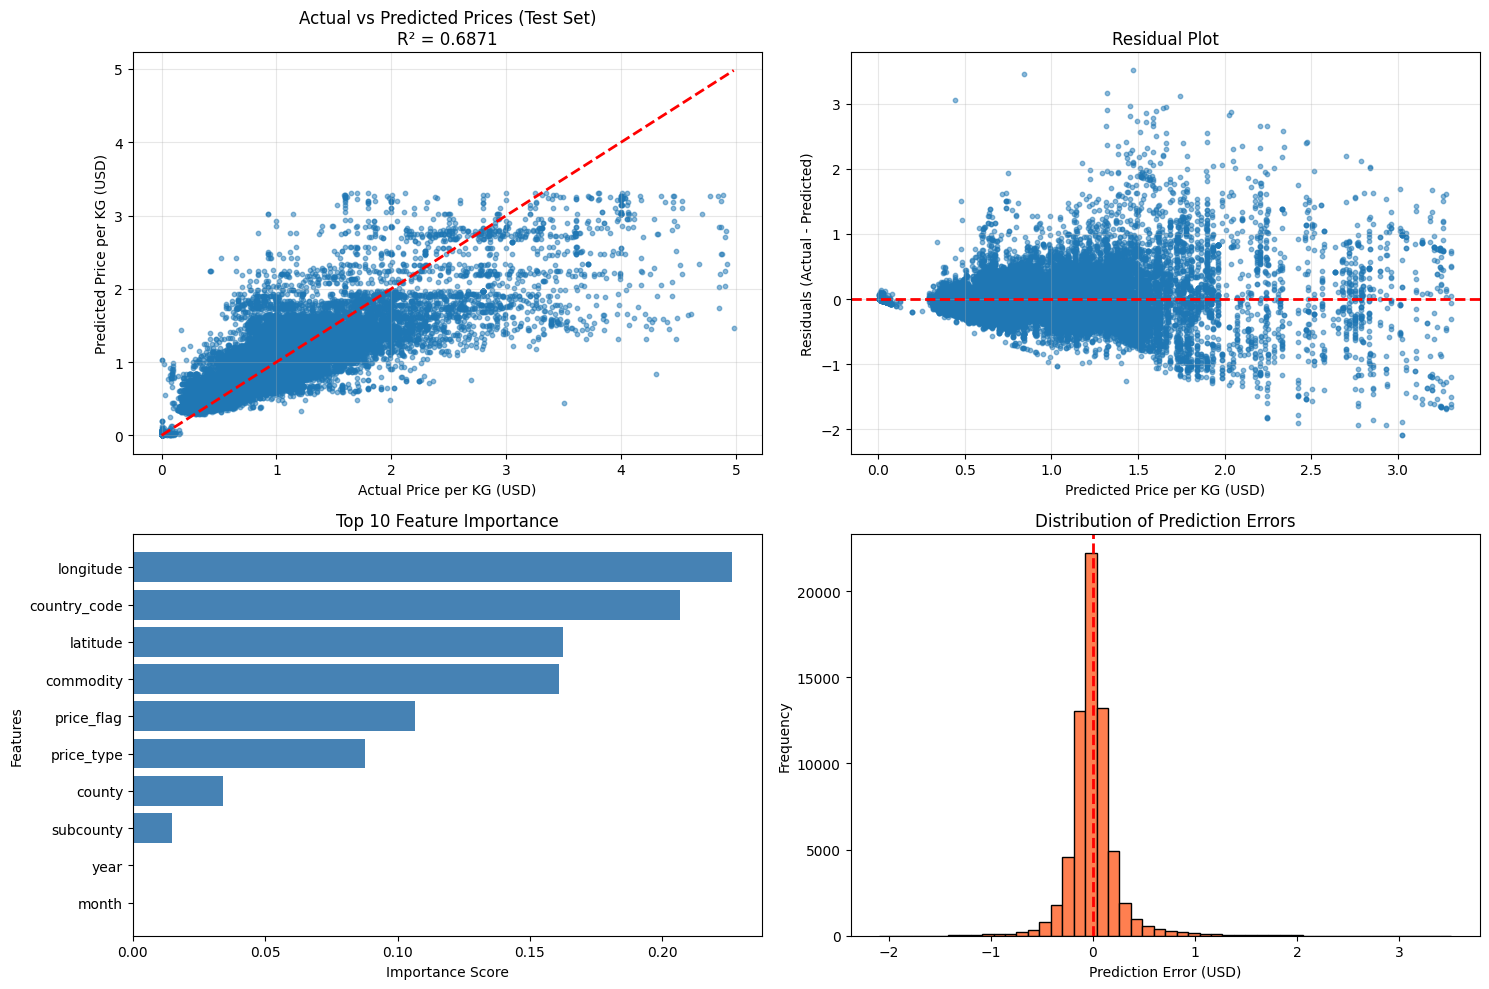


INTERPRETATION:
- R² Score: Proportion of variance explained (closer to 1 is better)
- RMSE: Average prediction error in dollars
- MAE: Average absolute error in dollars
- Feature Importance: Which features XGBoost relies on most
- XGBoost typically outperforms Linear Regression for complex patterns


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("XGBOOST REGRESSION MODEL")
print("="*60)

# Prepare the data
X = df.drop(columns=['price_per_kg_usd'])
y = df['price_per_kg_usd']

# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nEncoding {len(categorical_cols)} categorical features...")

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Convert date to numerical features
if 'date' in X_encoded.columns:
    X_encoded['date'] = pd.to_datetime(X_encoded['date'])
    X_encoded['year'] = X_encoded['date'].dt.year
    X_encoded['month'] = X_encoded['date'].dt.month
    X_encoded['day'] = X_encoded['date'].dt.day
    X_encoded = X_encoded.drop(columns=['date'])

print(f"Features used: {list(X_encoded.columns)}")
print(f"Total samples: {len(X_encoded):,}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Create and train the XGBoost model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,           # Number of boosting rounds
    max_depth=6,                # Maximum tree depth
    learning_rate=0.1,          # Step size shrinkage
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of columns
    random_state=42,
    n_jobs=-1                   # Use all CPU cores
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:.4f}")
print(f"  MAE: ${train_mae:.4f}")

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:.4f}")
print(f"  MAE: ${test_mae:.4f}")

# Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Top 10)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price per KG (USD)')
axes[0, 0].set_ylabel('Predicted Price per KG (USD)')
axes[0, 0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {test_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price per KG (USD)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['Feature'], top_features['Importance'], color='steelblue')
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_ylabel('Features')
axes[1, 0].set_title('Top 10 Feature Importance')
axes[1, 0].invert_yaxis()

# Plot 4: Prediction Error Distribution
errors = y_test - y_test_pred
axes[1, 1].hist(errors, bins=50, edgecolor='black', color='coral')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Prediction Error (USD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- R² Score: Proportion of variance explained (closer to 1 is better)")
print("- RMSE: Average prediction error in dollars")
print("- MAE: Average absolute error in dollars")
print("- Feature Importance: Which features XGBoost relies on most")
print("- XGBoost typically outperforms Linear Regression for complex patterns")

CATBOOST REGRESSION MODEL

Categorical features (handled natively by CatBoost): ['country_code', 'date', 'county', 'subcounty', 'commodity', 'price_flag', 'price_type']
Features used: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']
Total samples: 332,022

Training set: 265,617 samples
Test set: 66,405 samples

Training CatBoost model...

MODEL PERFORMANCE

Training Set Metrics:
  R² Score: 0.7588
  RMSE: $0.2267
  MAE: $0.1294

Test Set Metrics:
  R² Score: 0.7561
  RMSE: $0.2246
  MAE: $0.1294

FEATURE IMPORTANCE (Top 10)
     Feature  Importance
country_code   39.820832
   commodity   20.182394
        year   13.232260
    latitude   12.440917
   longitude    7.777688
      county    3.306898
   subcounty    2.122834
  price_type    0.566739
  price_flag    0.530083
       month    0.019357


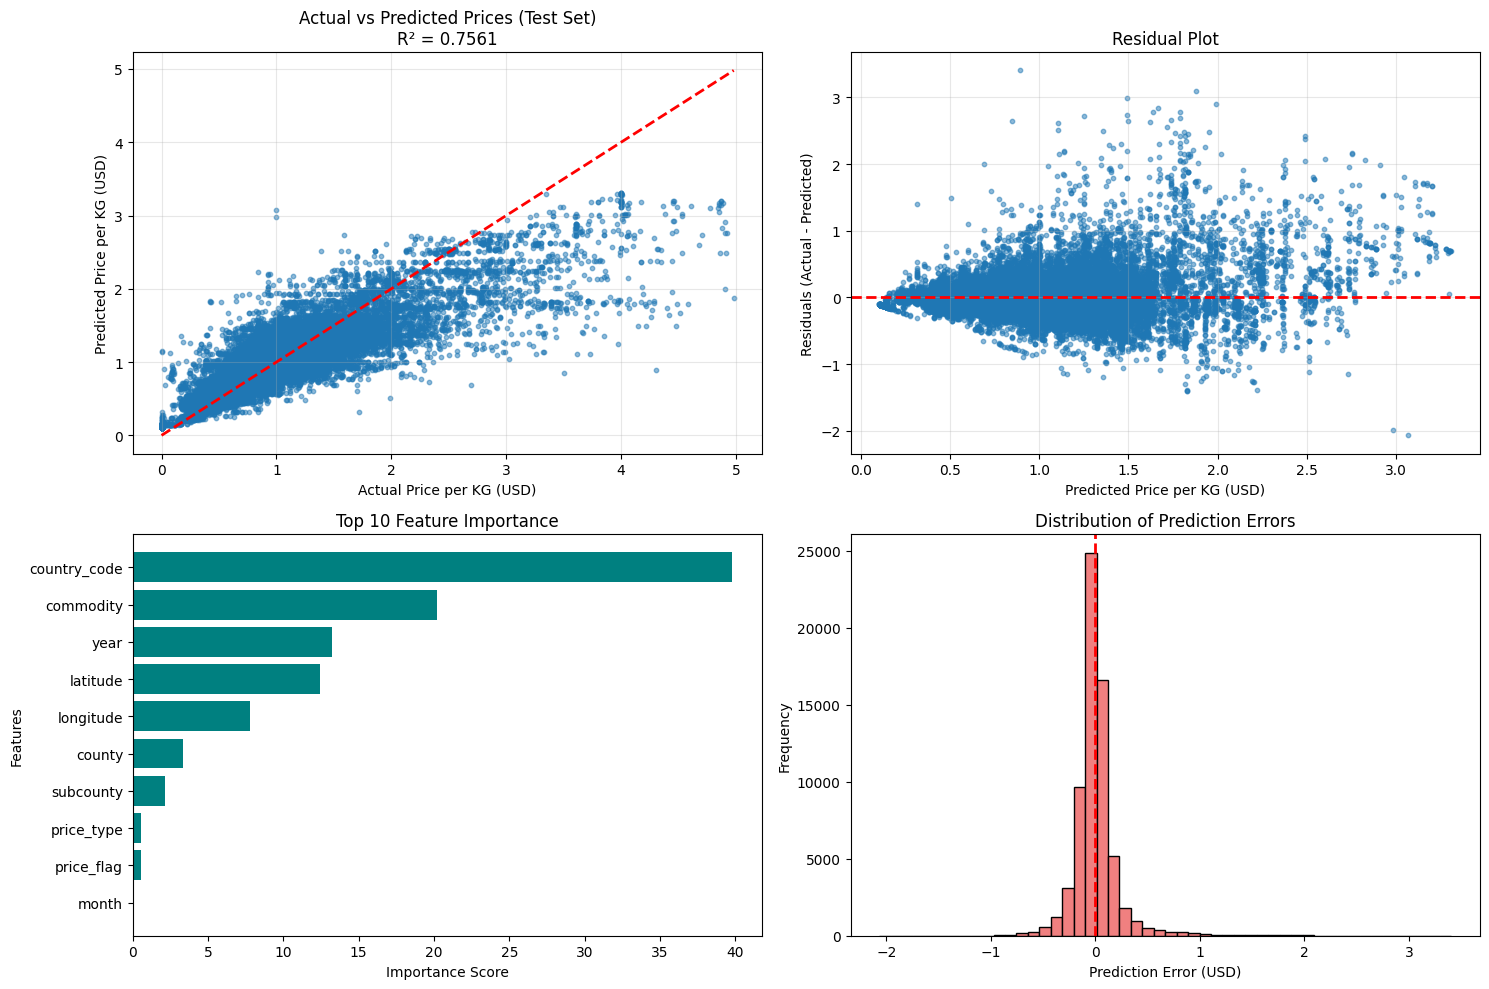


INTERPRETATION:
- R² Score: Proportion of variance explained (closer to 1 is better)
- RMSE: Average prediction error in dollars
- MAE: Average absolute error in dollars
- Feature Importance: Which features CatBoost relies on most
- CatBoost advantage: Handles categorical features natively (no encoding needed!)
- Often best performance on datasets with many categorical features


In [37]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("="*60)
print("CATBOOST REGRESSION MODEL")
print("="*60)

# Prepare the data
X = df.drop(columns=['price_per_kg_usd'])
y = df['price_per_kg_usd']

# Identify categorical columns (CatBoost can handle them natively!)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features (handled natively by CatBoost): {categorical_cols}")

# Convert date to numerical features
X_processed = X.copy()
if 'date' in X_processed.columns:
    X_processed['date'] = pd.to_datetime(X_processed['date'])
    X_processed['year'] = X_processed['date'].dt.year
    X_processed['month'] = X_processed['date'].dt.month
    X_processed['day'] = X_processed['date'].dt.day
    X_processed = X_processed.drop(columns=['date'])

# Update categorical columns list after date processing
categorical_features = [col for col in categorical_cols if col in X_processed.columns]

print(f"Features used: {list(X_processed.columns)}")
print(f"Total samples: {len(X_processed):,}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Create and train the CatBoost model
print("\nTraining CatBoost model...")
catboost_model = CatBoostRegressor(
    iterations=100,              # Number of boosting iterations
    learning_rate=0.1,          # Learning rate
    depth=6,                    # Tree depth
    loss_function='RMSE',       # Loss function
    cat_features=categorical_features,  # Categorical features
    random_state=42,
    verbose=False               # Suppress training output
)

catboost_model.fit(X_train, y_train)

# Make predictions
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)

# Evaluate the model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:.4f}")
print(f"  MAE: ${train_mae:.4f}")

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:.4f}")
print(f"  MAE: ${test_mae:.4f}")

# Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Top 10)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': catboost_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price per KG (USD)')
axes[0, 0].set_ylabel('Predicted Price per KG (USD)')
axes[0, 0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {test_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price per KG (USD)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['Feature'], top_features['Importance'], color='teal')
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_ylabel('Features')
axes[1, 0].set_title('Top 10 Feature Importance')
axes[1, 0].invert_yaxis()

# Plot 4: Prediction Error Distribution
errors = y_test - y_test_pred
axes[1, 1].hist(errors, bins=50, edgecolor='black', color='lightcoral')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Prediction Error (USD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- R² Score: Proportion of variance explained (closer to 1 is better)")
print("- RMSE: Average prediction error in dollars")
print("- MAE: Average absolute error in dollars")
print("- Feature Importance: Which features CatBoost relies on most")
print("- CatBoost advantage: Handles categorical features natively (no encoding needed!)")
print("- Often best performance on datasets with many categorical features")

LIGHTGBM REGRESSION MODEL

Encoding 7 categorical features...
Features used: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']
Total samples: 332,022

Training set: 265,617 samples
Test set: 66,405 samples

Training LightGBM model...

MODEL PERFORMANCE

Training Set Metrics:
  R² Score: 0.6947
  RMSE: $0.2550
  MAE: $0.1526

Test Set Metrics:
  R² Score: 0.6816
  RMSE: $0.2566
  MAE: $0.1535

FEATURE IMPORTANCE (Top 10)
     Feature  Importance
    latitude         595
   commodity         567
   longitude         520
country_code         493
      county         311
   subcounty         288
  price_type         123
  price_flag         100
        year           0
       month           0


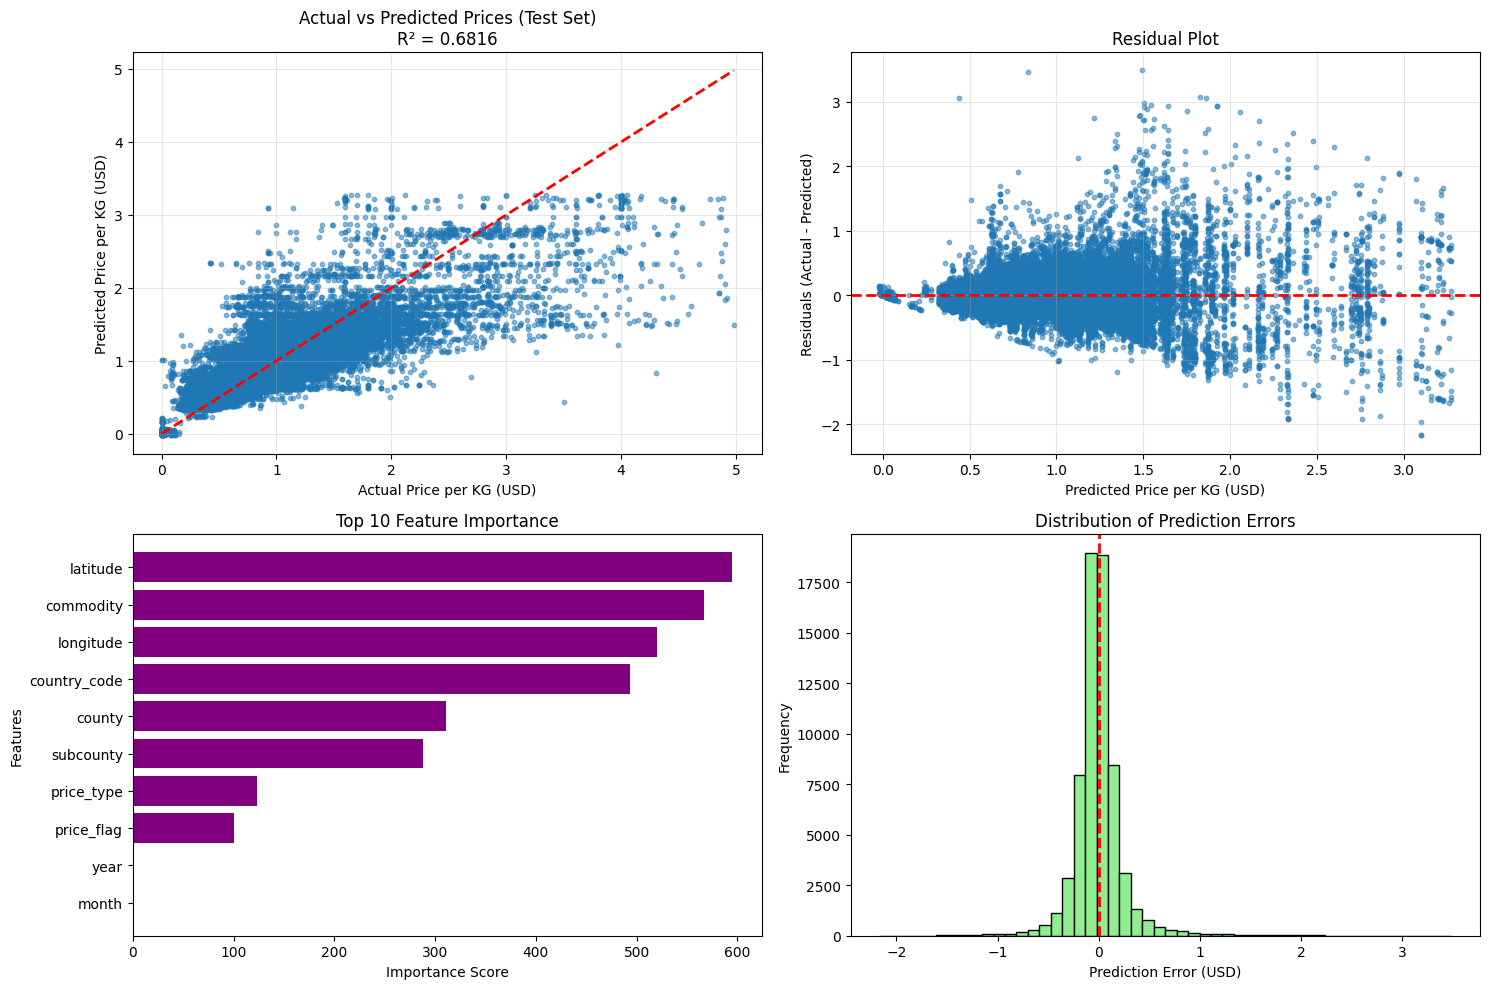


INTERPRETATION:
- R² Score: Proportion of variance explained (closer to 1 is better)
- RMSE: Average prediction error in dollars
- MAE: Average absolute error in dollars
- Feature Importance: Which features LightGBM relies on most
- LightGBM advantage: Very fast training, often comparable accuracy to XGBoost
- Uses histogram-based learning for speed on large datasets


In [38]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("LIGHTGBM REGRESSION MODEL")
print("="*60)

# Prepare the data
X = df.drop(columns=['price_per_kg_usd'])
y = df['price_per_kg_usd']

# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nEncoding {len(categorical_cols)} categorical features...")

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Convert date to numerical features
if 'date' in X_encoded.columns:
    X_encoded['date'] = pd.to_datetime(X_encoded['date'])
    X_encoded['year'] = X_encoded['date'].dt.year
    X_encoded['month'] = X_encoded['date'].dt.month
    X_encoded['day'] = X_encoded['date'].dt.day
    X_encoded = X_encoded.drop(columns=['date'])

print(f"Features used: {list(X_encoded.columns)}")
print(f"Total samples: {len(X_encoded):,}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Create and train the LightGBM model
print("\nTraining LightGBM model...")
lgbm_model = lgb.LGBMRegressor(
    n_estimators=100,           # Number of boosting rounds
    max_depth=6,                # Maximum tree depth
    learning_rate=0.1,          # Learning rate
    num_leaves=31,              # Max number of leaves in one tree
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of columns
    random_state=42,
    n_jobs=-1,                  # Use all CPU cores
    verbose=-1                  # Suppress warnings
)

lgbm_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

# Evaluate the model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:.4f}")
print(f"  MAE: ${train_mae:.4f}")

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:.4f}")
print(f"  MAE: ${test_mae:.4f}")

# Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Top 10)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price per KG (USD)')
axes[0, 0].set_ylabel('Predicted Price per KG (USD)')
axes[0, 0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {test_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price per KG (USD)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['Feature'], top_features['Importance'], color='purple')
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_ylabel('Features')
axes[1, 0].set_title('Top 10 Feature Importance')
axes[1, 0].invert_yaxis()

# Plot 4: Prediction Error Distribution
errors = y_test - y_test_pred
axes[1, 1].hist(errors, bins=50, edgecolor='black', color='lightgreen')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Prediction Error (USD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- R² Score: Proportion of variance explained (closer to 1 is better)")
print("- RMSE: Average prediction error in dollars")
print("- MAE: Average absolute error in dollars")
print("- Feature Importance: Which features LightGBM relies on most")
print("- LightGBM advantage: Very fast training, often comparable accuracy to XGBoost")
print("- Uses histogram-based learning for speed on large datasets")

RANDOM FOREST REGRESSION MODEL

Encoding 7 categorical features...
Features used: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']
Total samples: 332,022

Training set: 265,617 samples
Test set: 66,405 samples

Training Random Forest model...

MODEL PERFORMANCE

Training Set Metrics:
  R² Score: 0.7348
  RMSE: $0.2376
  MAE: $0.1381

Test Set Metrics:
  R² Score: 0.7176
  RMSE: $0.2417
  MAE: $0.1401

FEATURE IMPORTANCE (Top 10)
     Feature  Importance
   longitude    0.264898
    latitude    0.215122
country_code    0.211962
   commodity    0.160567
      county    0.049831
   subcounty    0.044782
  price_flag    0.030221
  price_type    0.022618
        year    0.000000
       month    0.000000


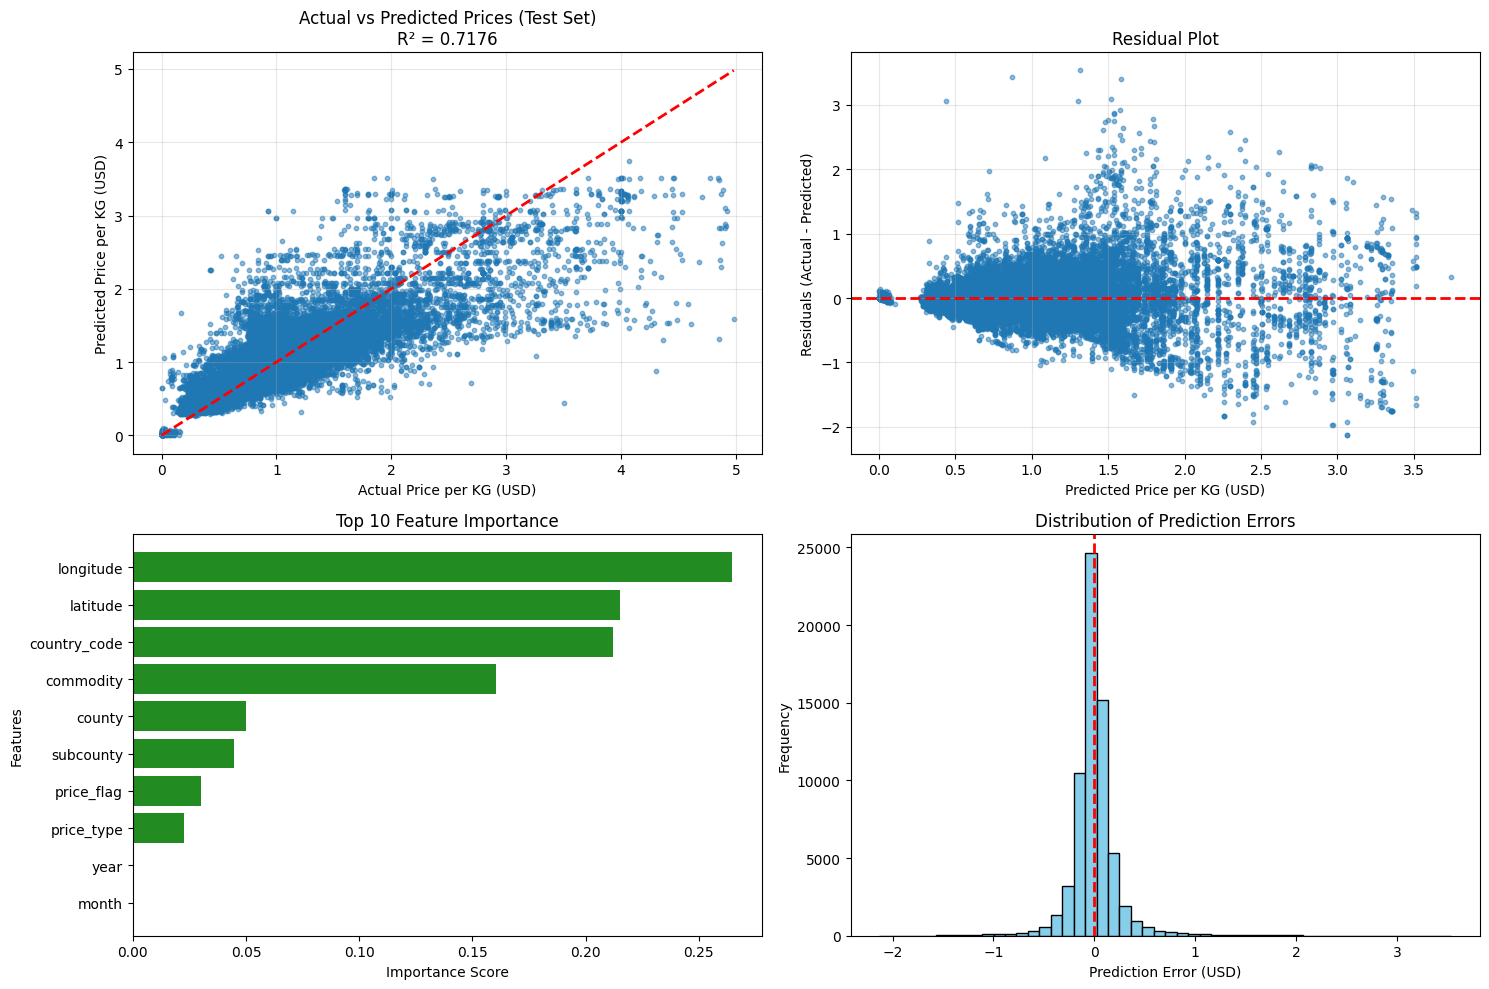


INTERPRETATION:
- R² Score: Proportion of variance explained (closer to 1 is better)
- RMSE: Average prediction error in dollars
- MAE: Average absolute error in dollars
- Feature Importance: Average importance across all trees
- Random Forest advantages:
  * Very robust to overfitting
  * Works well out-of-the-box with minimal tuning
  * Provides reliable feature importance
  * Handles non-linear relationships well


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("RANDOM FOREST REGRESSION MODEL")
print("="*60)

# Prepare the data
X = df.drop(columns=['price_per_kg_usd'])
y = df['price_per_kg_usd']

# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nEncoding {len(categorical_cols)} categorical features...")

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Convert date to numerical features
if 'date' in X_encoded.columns:
    X_encoded['date'] = pd.to_datetime(X_encoded['date'])
    X_encoded['year'] = X_encoded['date'].dt.year
    X_encoded['month'] = X_encoded['date'].dt.month
    X_encoded['day'] = X_encoded['date'].dt.day
    X_encoded = X_encoded.drop(columns=['date'])

print(f"Features used: {list(X_encoded.columns)}")
print(f"Total samples: {len(X_encoded):,}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

# Create and train the Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestRegressor(
    n_estimators=100,           # Number of trees in the forest
    max_depth=15,               # Maximum depth of trees
    min_samples_split=5,        # Min samples required to split a node
    min_samples_leaf=2,         # Min samples required at leaf node
    max_features='sqrt',        # Number of features to consider for best split
    random_state=42,
    n_jobs=-1,                  # Use all CPU cores
    verbose=0                   # Suppress output
)

rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:.4f}")
print(f"  MAE: ${train_mae:.4f}")

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:.4f}")
print(f"  MAE: ${test_mae:.4f}")

# Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Top 10)")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price per KG (USD)')
axes[0, 0].set_ylabel('Predicted Price per KG (USD)')
axes[0, 0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {test_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price per KG (USD)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Importance
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['Feature'], top_features['Importance'], color='forestgreen')
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_ylabel('Features')
axes[1, 0].set_title('Top 10 Feature Importance')
axes[1, 0].invert_yaxis()

# Plot 4: Prediction Error Distribution
errors = y_test - y_test_pred
axes[1, 1].hist(errors, bins=50, edgecolor='black', color='skyblue')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Prediction Error (USD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- R² Score: Proportion of variance explained (closer to 1 is better)")
print("- RMSE: Average prediction error in dollars")
print("- MAE: Average absolute error in dollars")
print("- Feature Importance: Average importance across all trees")
print("- Random Forest advantages:")
print("  * Very robust to overfitting")
print("  * Works well out-of-the-box with minimal tuning")
print("  * Provides reliable feature importance")
print("  * Handles non-linear relationships well")

STACKING ENSEMBLE MODEL
Combining: Linear Regression, XGBoost, LightGBM, CatBoost, Random Forest

Encoding 7 categorical features...
Features used: ['country_code', 'county', 'subcounty', 'latitude', 'longitude', 'commodity', 'price_flag', 'price_type', 'year', 'month', 'day']
Total samples: 332,022

Training set: 265,617 samples
Test set: 66,405 samples

DEFINING BASE MODELS (Level 0)
Base Models:
  - linear_reg
  - xgboost
  - lightgbm
  - catboost
  - random_forest

Meta-Model (Level 1): Ridge Regression

TRAINING STACKING ENSEMBLE
This may take a few minutes...
✓ Training complete!

Making predictions...

MODEL PERFORMANCE

Training Set Metrics:
  R² Score: 0.7294
  RMSE: $0.2401
  MAE: $0.1386

Test Set Metrics:
  R² Score: 0.7112
  RMSE: $0.2444
  MAE: $0.1405

BASE MODEL INDIVIDUAL PERFORMANCE
linear_reg      - R²: 0.0702, RMSE: $0.4386
xgboost         - R²: 0.6909, RMSE: $0.2528
lightgbm        - R²: 0.6817, RMSE: $0.2566
catboost        - R²: 0.6348, RMSE: $0.2748
random_fores

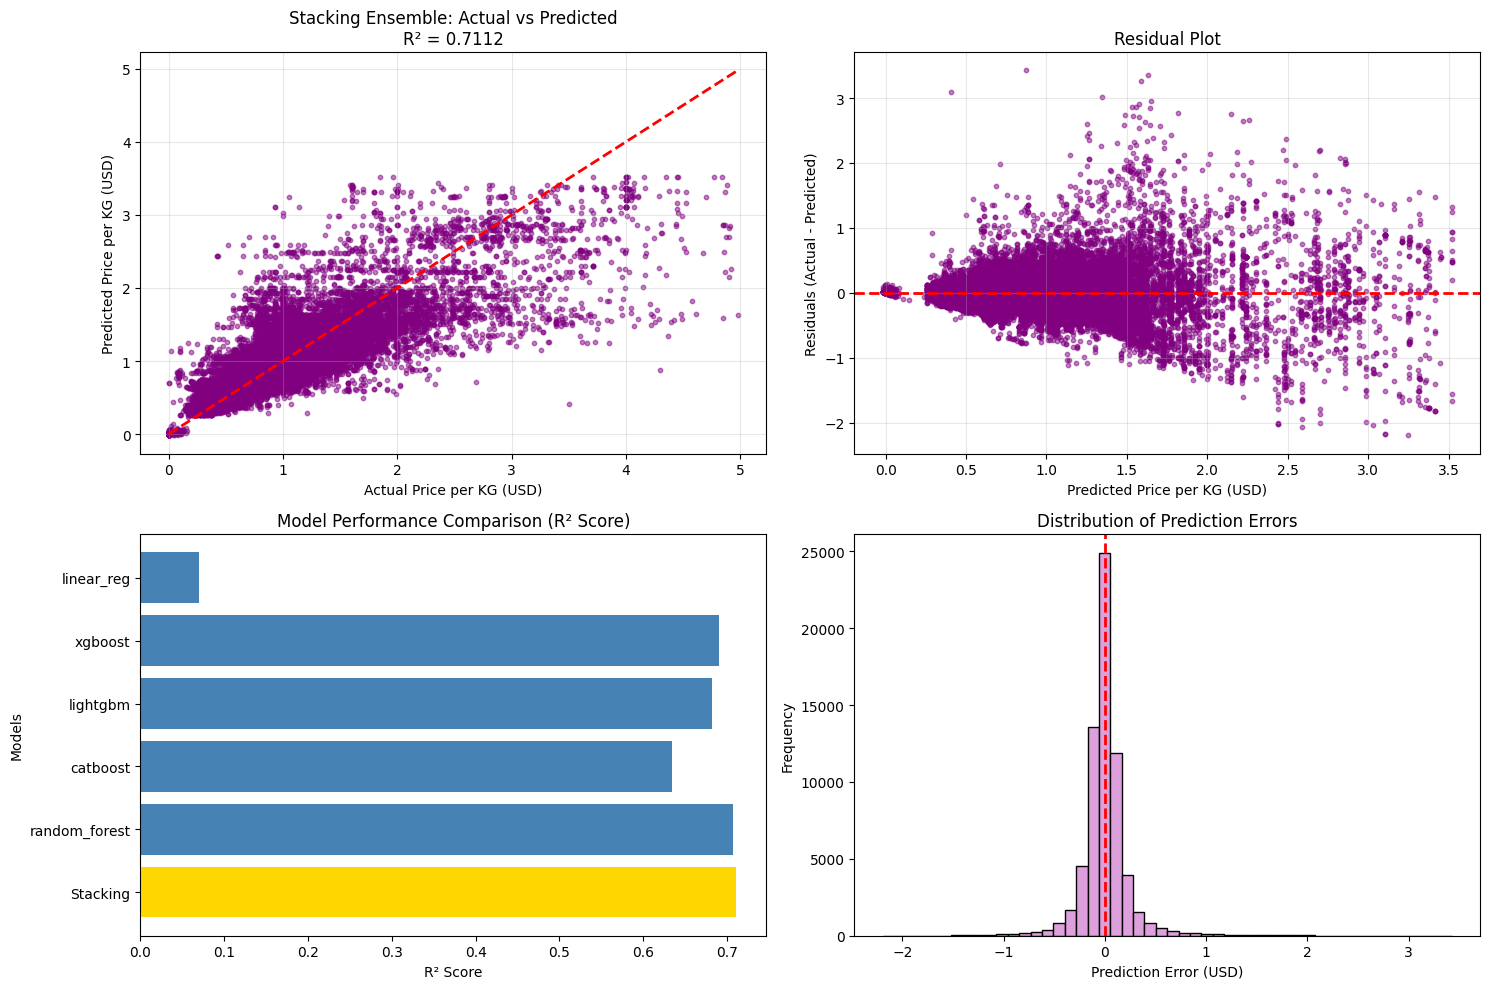


INTERPRETATION:
- Stacking combines predictions from all 5 base models
- Meta-model (Ridge) learns optimal weights for each base model
- Should perform better than individual models by leveraging their strengths
- 5-fold CV used to prevent overfitting in base predictions

Stacking advantages:
  * Combines diverse model strengths
  * Reduces individual model weaknesses
  * Often achieves best overall performance


In [41]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

print("="*60)
print("STACKING ENSEMBLE MODEL")
print("="*60)
print("Combining: Linear Regression, XGBoost, LightGBM, CatBoost, Random Forest")
print("="*60)

# Use the DRY preprocessing function
X_train, X_test, y_train, y_test, label_encoders = preprocess_data(df)

# Get categorical columns for summary
categorical_cols = df.drop(columns=['price_per_kg_usd']).select_dtypes(include=['object']).columns
print_data_summary(X_train, X_test, categorical_cols)

# Define base models (Level 0)
print("\n" + "="*60)
print("DEFINING BASE MODELS (Level 0)")
print("="*60)

base_models = [
    ('linear_reg', LinearRegression()),
    ('xgboost', xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )),
    ('lightgbm', lgb.LGBMRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )),
    ('catboost', CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=False
    )),
    ('random_forest', RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        n_jobs=-1,
        verbose=0
    ))
]

print("Base Models:")
for name, _ in base_models:
    print(f"  - {name}")

# Define meta-model (Level 1)
print("\nMeta-Model (Level 1): Ridge Regression")
meta_model = Ridge(alpha=1.0)

# Create stacking ensemble
print("\n" + "="*60)
print("TRAINING STACKING ENSEMBLE")
print("="*60)
print("This may take a few minutes...")

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # 5-fold cross-validation for base model predictions
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)
print("✓ Training complete!")

# Make predictions
print("\nMaking predictions...")
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Evaluate the model
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:.4f}")
print(f"  MAE: ${train_mae:.4f}")

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:.4f}")
print(f"  MAE: ${test_mae:.4f}")

# Get individual base model predictions for comparison
print("\n" + "="*60)
print("BASE MODEL INDIVIDUAL PERFORMANCE")
print("="*60)

for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)
    r2_individual = r2_score(y_test, y_pred_individual)
    rmse_individual = np.sqrt(mean_squared_error(y_test, y_pred_individual))
    print(f"{name:15s} - R²: {r2_individual:.4f}, RMSE: ${rmse_individual:.4f}")

print(f"\n{'STACKING':15s} - R²: {test_r2:.4f}, RMSE: ${test_rmse:.4f}")
print(f"{'':15s}   {'↑ BEST!' if test_r2 == max([r2_score(y_test, model.predict(X_test)) for _, model in base_models] + [test_r2]) else ''}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=10, color='purple')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price per KG (USD)')
axes[0, 0].set_ylabel('Predicted Price per KG (USD)')
axes[0, 0].set_title(f'Stacking Ensemble: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=10, color='purple')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price per KG (USD)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Model Comparison
model_names = [name for name, _ in base_models] + ['Stacking']
r2_scores = [r2_score(y_test, model.predict(X_test)) for _, model in base_models] + [test_r2]
colors = ['steelblue'] * len(base_models) + ['gold']

axes[1, 0].barh(model_names, r2_scores, color=colors)
axes[1, 0].set_xlabel('R² Score')
axes[1, 0].set_ylabel('Models')
axes[1, 0].set_title('Model Performance Comparison (R² Score)')
axes[1, 0].invert_yaxis()

# Plot 4: Prediction Error Distribution
errors = y_test - y_test_pred
axes[1, 1].hist(errors, bins=50, edgecolor='black', color='plum')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Prediction Error (USD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("- Stacking combines predictions from all 5 base models")
print("- Meta-model (Ridge) learns optimal weights for each base model")
print("- Should perform better than individual models by leveraging their strengths")
print("- 5-fold CV used to prevent overfitting in base predictions")
print("\nStacking advantages:")
print("  * Combines diverse model strengths")
print("  * Reduces individual model weaknesses")
print("  * Often achieves best overall performance")